300.091552734375


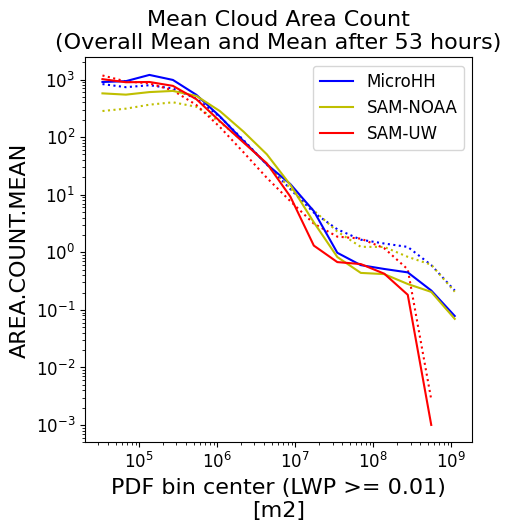

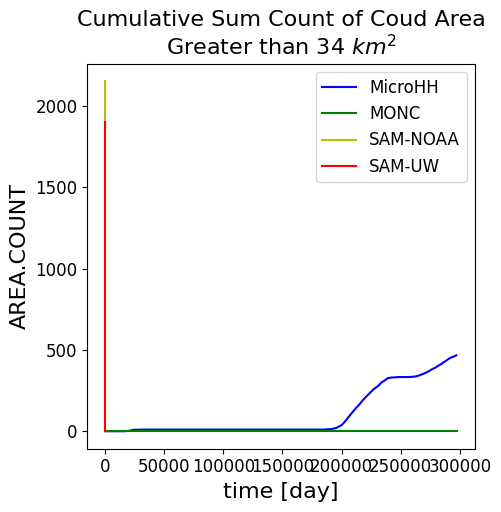

In [18]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_cloud_pdfs/microhh.Feb_2nd.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
#MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_cloud_pdfs/d20200202_diagnostic_2d.LWP.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=True)
SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_cloud_pdfs/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt_2D_0300s_select_vars.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
SAM_UW=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_cloud_pdfs/EUREC4A_2Feb_1024sqx151_150m_M2005_RRTM_Lagtraj_NC400_km_1024.2Dbin_1.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)
DALES=xr.open_dataset('/fs/ess/PFS0220/eurec4a/DALES_cloud_pdfs/DALES_Feb2.LWP_>=_0.01.connected_regions.pdf.nc',decode_times=False)

plot_var='AREA.COUNT'

figure=pl.figure(figsize=(5,5))
MHH['AREA.COUNT.SECTIONMEAN']=MHH[plot_var].isel(time=slice(53*12,None)).mean(dim=['time'])
DALES['AREA.COUNT.SECTIONMEAN']=DALES[plot_var].isel(time=slice(53*4,None)).mean(dim=['time'])
SAM_NOAA['AREA.COUNT.SECTIONMEAN']=SAM_NOAA[plot_var].isel(time=slice(53*12,None)).mean(dim=['time'])
SAM_UW['AREA.COUNT.SECTIONMEAN']=SAM_UW[plot_var].isel(time=slice(53*12,None)).mean(dim=['time'])
MHH['AREA.COUNT.SECTIONMEAN'].where(MHH['AREA.COUNT.SECTIONMEAN']>0).plot.line('b:')
#DALES['AREA.COUNT.SECTIONMEAN'].where(DALES['AREA.COUNT.SECTIONMEAN']>0).plot.line('g:')
SAM_NOAA['AREA.COUNT.SECTIONMEAN'].where(SAM_NOAA['AREA.COUNT.SECTIONMEAN']>0).plot.line('y:')
SAM_UW['AREA.COUNT.SECTIONMEAN'].where(SAM_UW['AREA.COUNT.SECTIONMEAN']>0).plot.line('r:')

MHH['AREA.COUNT.MEAN']=MHH[plot_var].mean(dim=['time'])
DALES['AREA.COUNT.MEAN']=DALES[plot_var].mean(dim=['time'])
SAM_NOAA['AREA.COUNT.MEAN']=SAM_NOAA[plot_var].mean(dim=['time'])
SAM_UW['AREA.COUNT.MEAN']=SAM_UW[plot_var].mean(dim=['time'])
MHH['AREA.COUNT.MEAN'].where(MHH['AREA.COUNT.MEAN']>0).plot.line('b-',label='MicroHH')
#DALES['AREA.COUNT.MEAN'].where(DALES['AREA.COUNT.MEAN']>0).plot.line('g-',label='MONC')
SAM_NOAA['AREA.COUNT.MEAN'].where(SAM_NOAA['AREA.COUNT.MEAN']>0).plot.line('y-',label='SAM-NOAA')
SAM_UW['AREA.COUNT.MEAN'].where(SAM_UW['AREA.COUNT.MEAN']>0).plot.line('r-',label='SAM-UW')
pl.xscale('log')
pl.legend()
pl.yscale('log')
pl.title(r"Mean Cloud Area Count" +"\n"+ "(Overall Mean and Mean after 53 hours)")

cut_off=10
figure=pl.figure(figsize=(5,5))
MHH[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).isel(time=slice(None,None,6)).cumsum().plot.line('b-',label='MicroHH')
DALES[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).cumsum().plot.line('g-',label='MONC')
SAM_NOAA[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).cumsum().plot.line('y-',label='SAM-NOAA')
SAM_UW[plot_var].isel(AREA=slice(cut_off,None)).sum(dim=['AREA']).cumsum().plot.line('r-',label='SAM-UW')
pl.legend()
pl.title(f'Cumulative Sum Count of Coud Area'+"\n"+ f'Greater than {int(MHH["AREA"].isel(AREA=cut_off).values/1e6)} $km^2$')
print((SAM_UW['time'].values[1]-SAM_UW['time'].values[0])*86400)

